Gradient calculation
======

___________________________________________________________

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def j_convex(w):
    return w[0] ** 2 + 2 * w[1] ** 2 #اصل فرمول خطی  

def grad_j_convex(w):
    return np.array([2 * w[0] , 4 * w[1]]) # مشتق گرفته شده

In [24]:
def gradient_descent(grad, w_init, learning_rate = 0.1, n_steps=200): # تعداد تکرار برای رسیدن به حداق و نرخ یادگیری  وابسته به هم هستند
    w = np.array(w_init)
    path = [w.copy()]

    for step in range(n_steps): #حلقه با تکرار برای رسیدن به حداقل 
        grad_w = grad(w)
        w = w - learning_rate * grad_w
        path.append(w.copy())
    return np.array(path)

In [25]:
w_init = [4, 4]
path_convex = gradient_descent(grad_j_convex, w_init,  learning_rate = 0.1, n_steps=500)
w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5 ,400)
w1, w2 = np.meshgrid(w1_vals, w2_vals)
j_vals = j_convex([w1, w2])

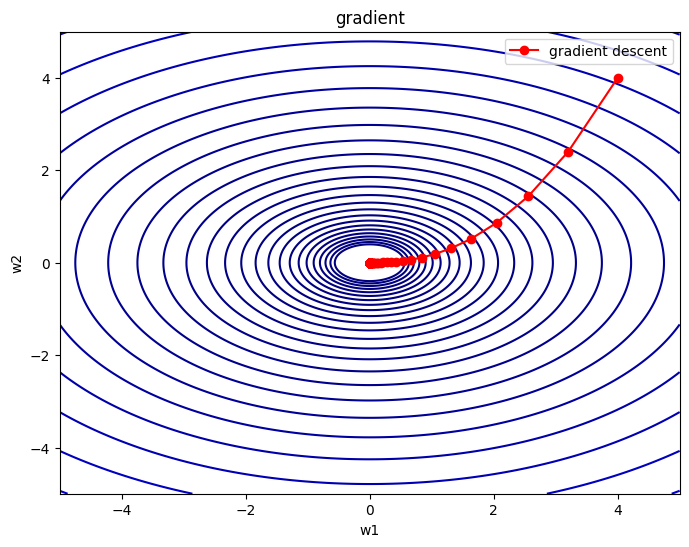

In [26]:
plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(w1, w2, j_vals, levels = contour_levels, cmap= 'jet')
path_x, path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, marker='o',color='red', label='gradient descent')  # Regression line
plt.title('gradient')
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()

Batch Gradient Descent
-

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.array([5, 3, -1, 2, 6])
y = np.array([14, 6, -5.5, 3.5, 18])   

In [7]:
m = len(x)

In [8]:
X_b = np.c_[np.ones((m, 1)), x.reshape(-1, 1)] #اضافه کردن بابایس میگوند که شامل یک یتون از 1هاست  و یک ستون ویژگی ها

In [38]:
def compute_cost(theta, X_b, y):
    m = len(y)  # تعداد نمونه‌ها
    predictions = X_b.dot(theta)  # محاسبه پیش‌بینی‌ها
    errors = predictions - y  # محاسبه خطاها
    squared_errors = errors ** 2  # مربعات خطاها
    cost = (1 / (2 * m)) * np.sum(squared_errors)  # محاسبه هزینه
    return cost


def batch_gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000):
    m, n = X_b.shape
    theta = np.random.randn(n, 1)  # مقداردهی اولیه تصادفی
    cost_history = []

    for iteration in range(n_iterations):
        gradients = (1 / m) * X_b.T.dot(X_b.dot(theta) - y)  # محاسبه گرادیان
        theta -= learning_rate * gradients  # به‌روزرسانی پارامترها
        cost_history.append(compute_cost(theta, X_b, y))  # ذخیره هزینه

    return theta, cost_history

In [40]:
y_reshaped = np.array(y).reshape(-1, 1)

# اجرای الگوریتم
theta, cost_history = batch_gradient_descent(X_b, y_reshaped)

# نمایش نتایج
print("پارامترهای بهینه (theta):", theta)


پارامترهای بهینه (theta): [[-2.78462038]
 [ 3.33658033]]


__________________________________

Mini-Batch Gradient Descent
=

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data( n = 50 , noise= 10):
    np.random.seed(42)
    x = np.linspace(-10, 10, n)
    #  y = 3x + 8
    slope = 3
    intercept = 8
    noise = np.random.randn(n) * noise
    y = slope * x + intercept + noise
    return x , y


x , y = generate_data( n = 500 , noise= 10)

In [3]:
m = len(x)

In [4]:
X_b = np.c_[np.ones((m, 1)), x.reshape(-1, 1)]

In [16]:
def compute_cost(theta, X_b, y):
    m = len(y)  # تعداد نمونه‌ها
    predictions = X_b.dot(theta)  # محاسبه پیش‌بینی‌ها
    errors = predictions - y  # محاسبه خطاها
    squared_errors = errors ** 2  # مربعات خطاها
    cost = (1 / (2 * m)) * np.sum(squared_errors)  # محاسبه هزینه
    return cost

# تابع Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000, batch_size=2):
    m, n = X_b.shape
    theta = np.random.randn(n, 1)  # مقداردهی اولیه تصادفی
    cost_history = []
    path = []  # برای ذخیره مسیر پارامترها

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)  # تصادفی کردن ایندکس‌ها
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices].reshape(-1, 1)

        for i in range(0, m, batch_size):
            X_b_mini_batch = X_b_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]

            gradients = (1 / batch_size) * X_b_mini_batch.T.dot(X_b_mini_batch.dot(theta) - y_mini_batch)
            theta -= learning_rate * gradients  # به‌روزرسانی پارامترها
            path.append(theta.flatten())  # ذخیره پارامترها

        cost_history.append(compute_cost(theta, X_b, y))

    return theta, cost_history, np.array(path)
    
theta, cost_history, path = mini_batch_gradient_descent(X_b, y.reshape(-1, 1), learning_rate=0.03, n_iterations=1000, batch_size=10)
print(theta[0], theta[1])
# ایجاد شبکه از پارامترها برای رسم نمودار کانتور
theta0_range = np.linspace(-10, 10, 100)  # محدوده برای theta0
theta1_range = np.linspace(-10, 10, 100)  # محدوده برای theta1
j_vals = np.zeros((len(theta0_range), len(theta1_range)))  # ماتریس هزینه

# محاسبه هزینه برای هر ترکیب از پارامترها
for i, theta0 in enumerate(theta0_range):
    for j, theta1 in enumerate(theta1_range):
        j_vals[i, j] = compute_cost(np.array([[theta0], [theta1]]), X_b, y)


        

[8.01024534] [2.88654809]


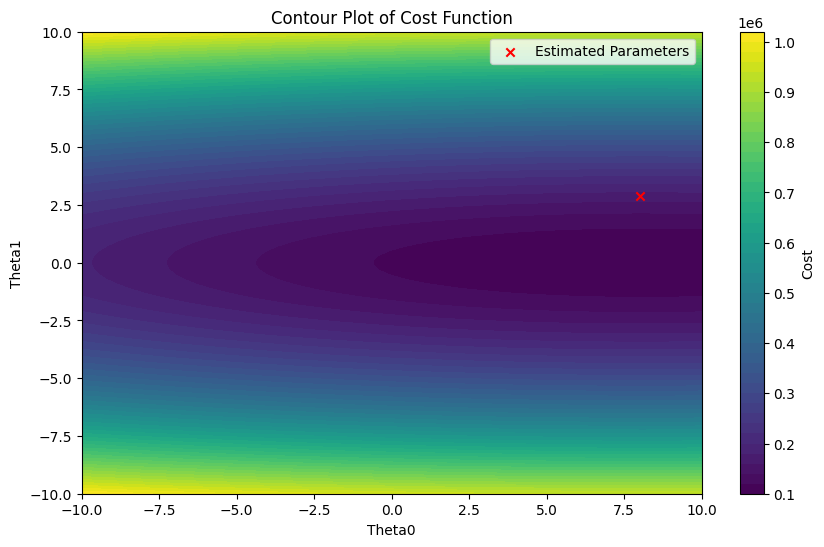

In [17]:


# رسم نمودار کانتور
plt.figure(figsize=(10, 6))
plt.contourf(theta0_range, theta1_range, j_vals.T, levels=50, cmap='viridis')
plt.colorbar(label='Cost')
plt.scatter(theta[0], theta[1], color='red', marker='x', label='Estimated Parameters')
plt.title('Contour Plot of Cost Function')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.legend()
plt.show()

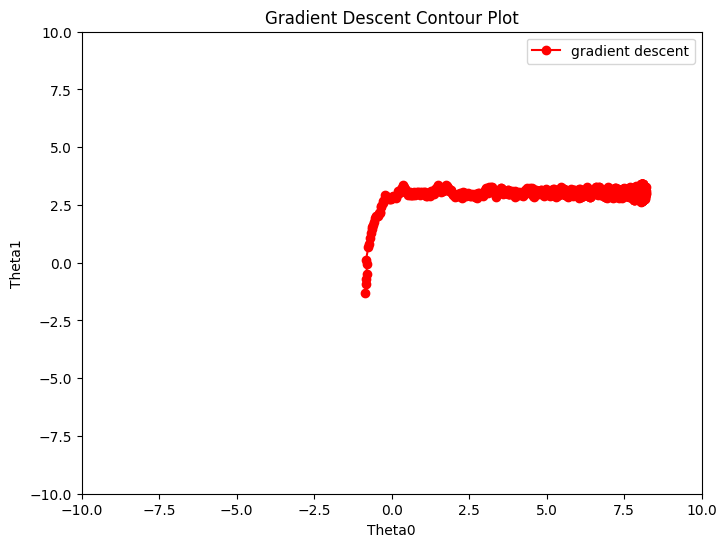

In [10]:

plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(theta0_range, theta1_range, j_vals.T, levels=contour_levels, cmap='jet')
path_x, path_y = path[:, 0], path[:, 1]
plt.plot(path_x, path_y, marker='o', color='red', label='gradient descent')  # مسیر گرادیان نزولی
plt.title('Gradient Descent Contour Plot')
plt.xlabel("Theta0")
plt.ylabel("Theta1")
plt.legend()
plt.show()
